<a href="https://colab.research.google.com/github/yuliyagk/ReDI-DS-2021-final-project/blob/main/Project_Orbit_Classification_Yuliya_Goncharuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orbit Classification For Prediction / NASA
The data used for the project can be found at: https://www.kaggle.com/brsdincer/orbitclassification

## Description of the Data

DATA FOR ORBIT CLASS PREDICTION
It is based on prediction process.
Data was generated without including unnecessary columns.

INLUCED:

* a (AU) -- Semi-major axis of the orbit in AU
* e -- Eccentricity of the orbit
* i (deg) -- Inclination of the orbit with respect to the ecliptic plane and the equinox of 
J2000 (J2000-Ecliptic) in degrees
* w (deg) -- Argument of perihelion (J2000-Ecliptic) in degrees
* Node (deg) -- Longitude of the ascending node (J2000-Ecliptic) in degrees
* M (deg) -- Mean anomoly at epoch in degrees
* q (AU) -- Perihelion distance of the orbit in AU
* Q (AU) -- Aphelion distance of the orbit in AU
* P (yr) -- Orbital period in Julian years
* H (mag) -- Absolute V-magnitude
* MOID (AU) -- Minimum orbit intersection distance (the minimum distance between the osculating orbits of the NEO and the Earth
class -- Object classification

CLASS:

* AMO*
* APO
* APO*
* ATE
* ATE*
* IEO*


# Data Analysis and Cleaning

In [1]:
# Import the usual packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Let's check if the data is there
!ls

'classast - pha.csv'   sample_data


In [3]:
# Loading in the file and look at the first few rows
df = pd.read_csv('classast - pha.csv')
df.head(20) 

a (AU)         e    i (deg)     w (deg)  ...  P (yr)  H (mag)  MOID (AU)  class
0   1.078066  0.826854  22.825495   31.382966  ...    1.12    16.90   0.034507   APO*
1   1.245304  0.335342  13.337482  276.893024  ...    1.39    15.60   0.030669   APO*
2   1.470264  0.559922   6.352995  285.852564  ...    1.78    16.25   0.025795   APO*
3   1.776025  0.650141  39.832538  267.791993  ...    2.37    15.20   0.003551   APO*
4   1.874123  0.764602   1.326400   43.388048  ...    2.57    18.80   0.011645   APO*
5   1.290180  0.299196  64.002772   61.550694  ...    1.47    16.00   0.043644   APO*
6   1.599623  0.502891  23.061908  290.878128  ...    2.02    17.94   0.010105   APO*
7   2.174989  0.713052   2.522360   98.256593  ...    3.21    15.25   0.003093   APO*
8   0.843829  0.449884   5.854591   39.926294  ...    0.78    20.20   0.006874   ATE*
9   1.768412  0.422950  22.150174   27.814247  ...    2.35    14.10   0.045300   AMO*
10  1.271216  0.889916  22.248053  322.162477  ...    1.43    14.60   0.019627   APO*
11  1.209442  0.322883   2.684855  301.650626  ...    1.33    19.03   0.013917   APO*
12  0.989506  0.468572   9.917185   55.040473  ...    0.98    18.30   0.013664   ATE*
13  2.198877  0.541091  13.531148  204.241530  ...    3.26    16.50   0.022126   APO*
14  1.834703  0.445494   3.867876   17.157845  ...    2.49    18.95   0.037892   AMO*
15  2.630994  0.630563   2.788447   95.034106  ...    4.27    15.99   0.043492   APO*
16  1.059654  0.443905  11.170074  296.580050  ...    1.09    18.40   0.019276   APO*
17  2.535446  0.629437   0.447195  278.718362  ...    4.04    15.30   0.006121   APO*
18  1.982399  0.634373   6.704877  236.325496  ...    2.79    14.40   0.028515   APO*
19  1.442258  0.586590   5.519775  291.775243  ...    1.73    17.10   0.028458   APO*

[20 rows x 12 columns]

In [4]:
# look at the columns
df.columns

Index(['a (AU)', 'e', 'i (deg)', 'w (deg)', 'Node (deg)', 'M (deg)', 'q (AU)',
       'Q (AU)', 'P (yr)', 'H (mag)', 'MOID (AU)', 'class'],
      dtype='object')

In [46]:
df.describe()

a (AU)            e  ...      H (mag)    MOID (AU)
count  1747.000000  1747.000000  ...  1747.000000  1747.000000
mean      1.736559     0.527178  ...    19.968380     0.023349
std       0.573877     0.179400  ...     1.505905     0.014313
min       0.635223     0.025425  ...    14.100000     0.000010
25%       1.264673     0.408513  ...    19.100000     0.011061
50%       1.697937     0.549271  ...    20.200000     0.022996
75%       2.177462     0.653394  ...    21.200000     0.034814
max       3.888719     0.956042  ...    22.400000     0.049987

[8 rows x 11 columns]

In [6]:
# look of the type of our dataset
df.dtypes

a (AU)        float64
e             float64
i (deg)       float64
w (deg)       float64
Node (deg)    float64
M (deg)       float64
q (AU)        float64
Q (AU)        float64
P (yr)        float64
H (mag)       float64
MOID (AU)     float64
class          object
dtype: object

In [7]:
# look if we have the missing data
df.isnull().sum()

a (AU)        0
e             0
i (deg)       0
w (deg)       0
Node (deg)    0
M (deg)       0
q (AU)        0
Q (AU)        0
P (yr)        0
H (mag)       0
MOID (AU)     0
class         0
dtype: int64

In [8]:
# looking if there are duplicate rows
(df.shape[0]) - (df.drop_duplicates().shape[0])

0

In [9]:
# look at the class values
df['class'].unique()

array(['APO*', 'ATE*', 'AMO*', 'APO', 'IEO*', 'ATE'], dtype=object)

In [10]:
# count the value of the class rate
df['class'].value_counts()

APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: class, dtype: int64

In [11]:
# Use only two classes and see if this can be better classified which was not the case
#df['class'].replace({'APO*': 'A', 'ATE*': 'A', 'AMO*': 'A', 'APO': 'B', 'ATE': 'B', 'IEO*': 'A' }, inplace=True)

# Was used to see in pairplot possible correlation to other features 
#df['class'].replace({'APO*': '1', 'ATE*': '2', 'AMO*': '3', 'APO': '4', 'ATE': '5', 'IEO*': '6' }, inplace=True)
#df = df.astype({'class': int})
#df.dtypes


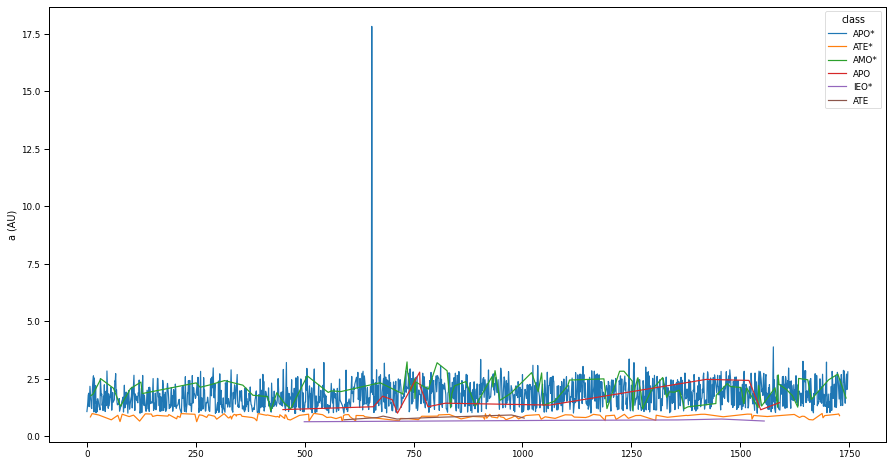

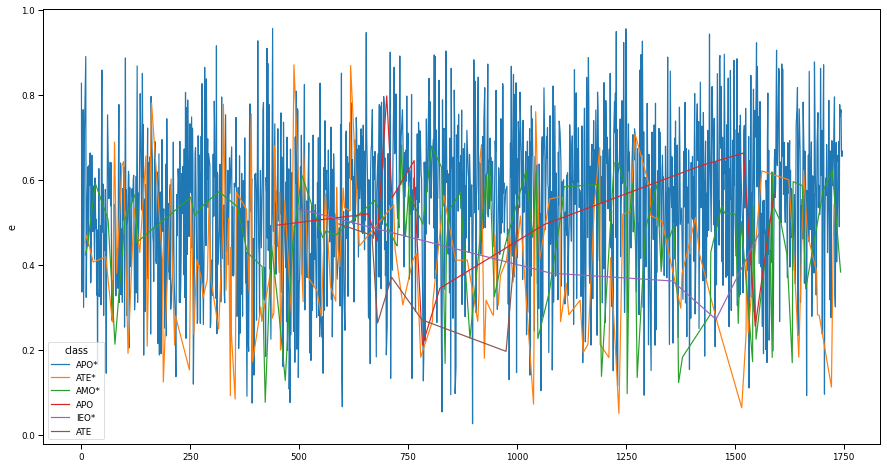

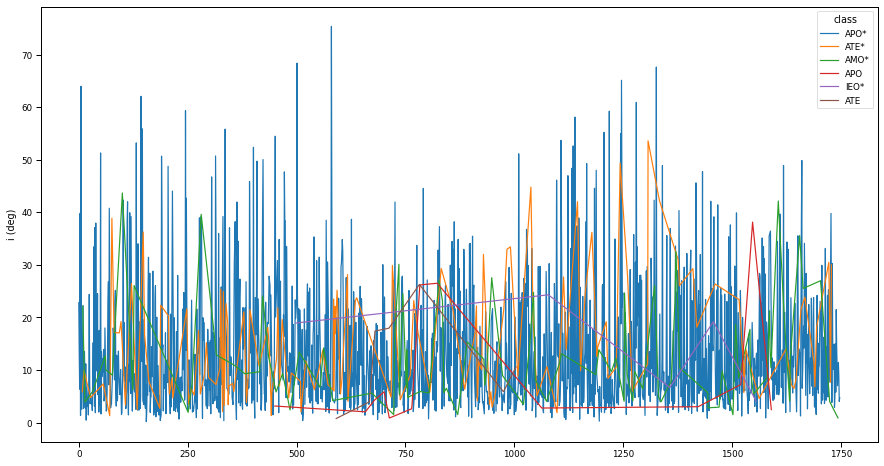

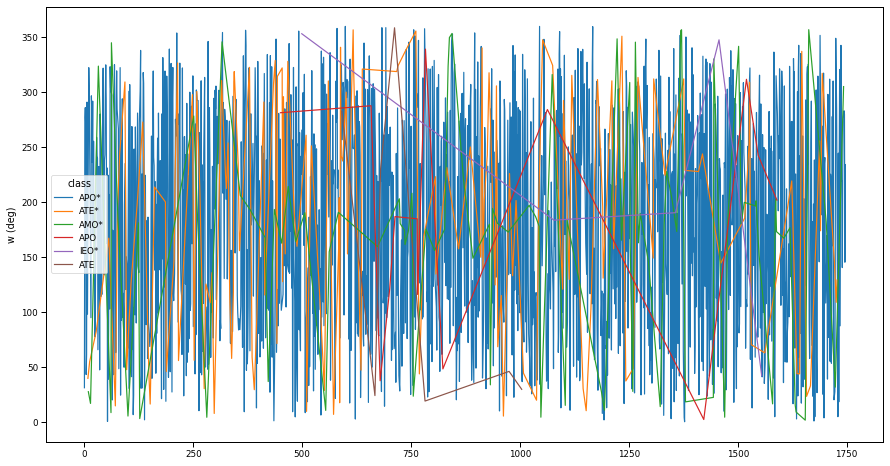

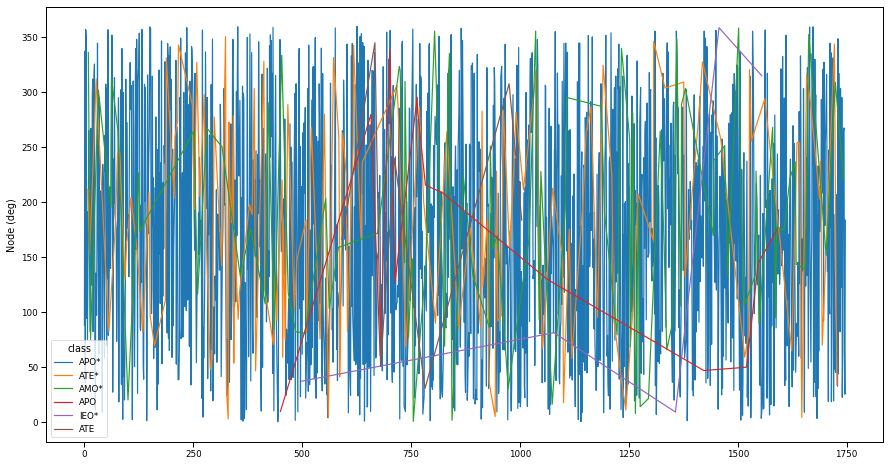

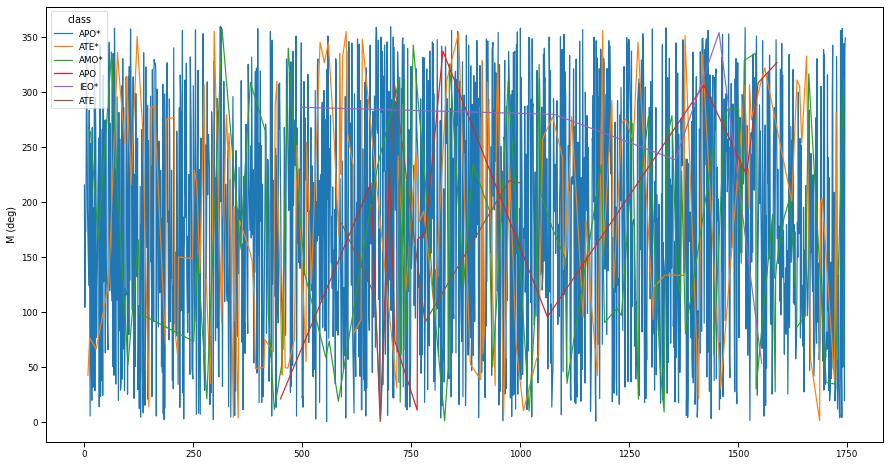

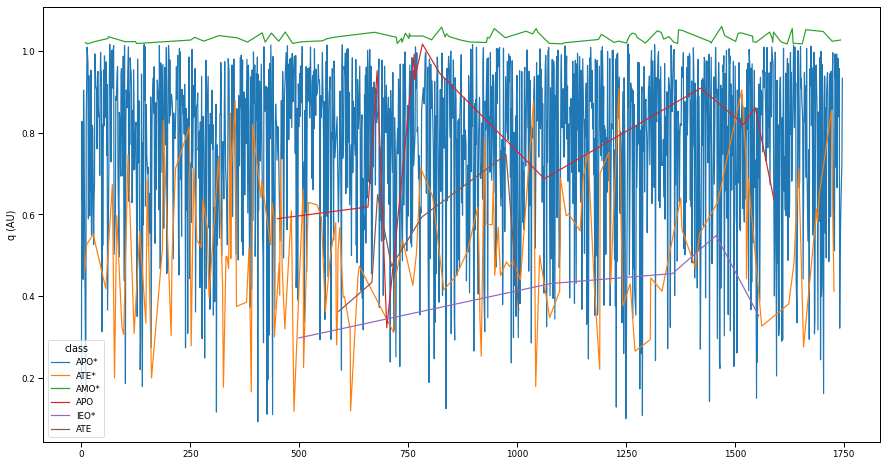

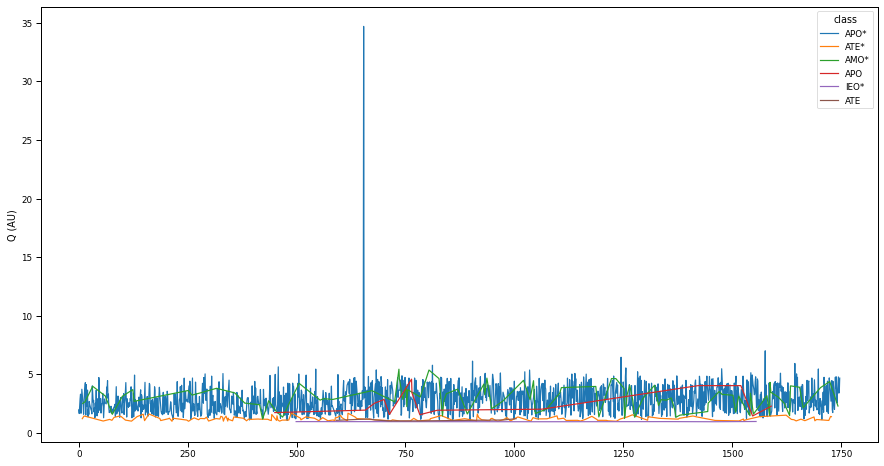

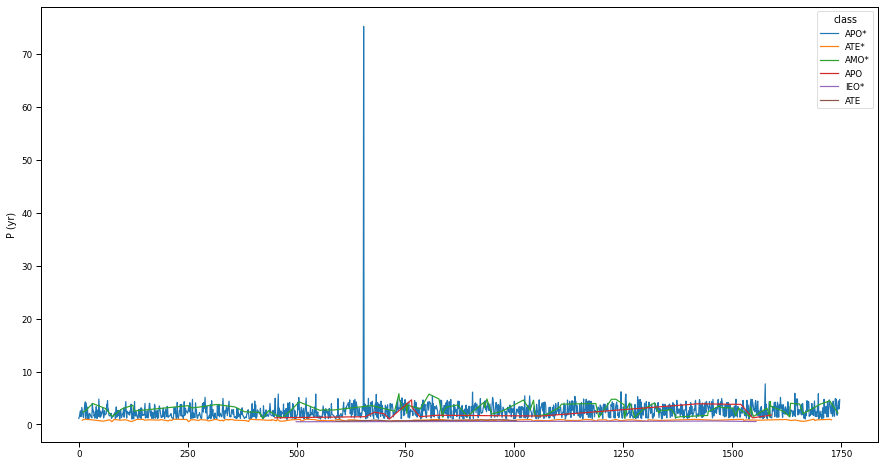

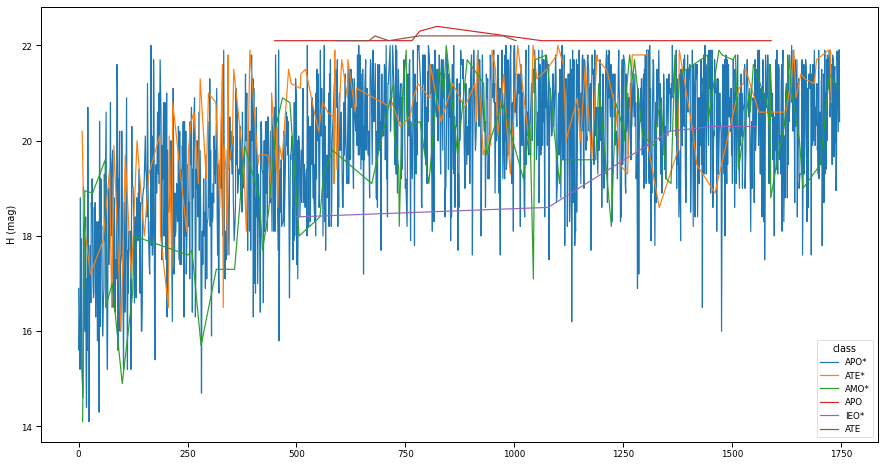

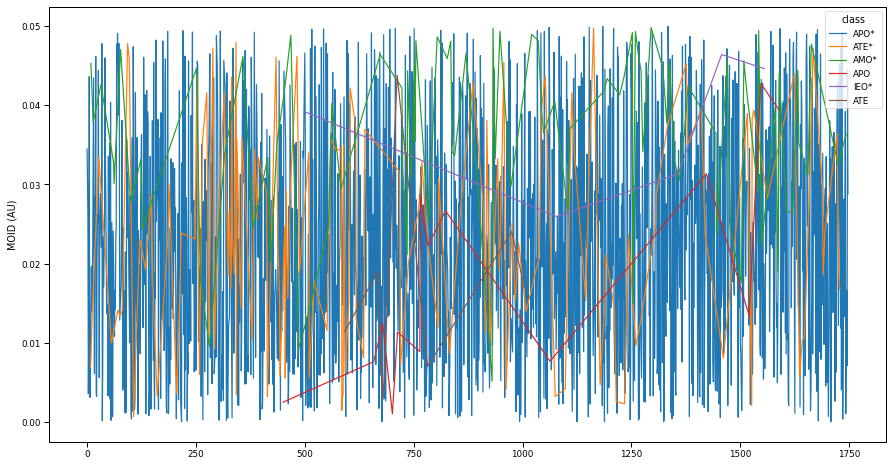

In [12]:
plt.rcParams['figure.figsize'] = (15,8)
sns.set_context("paper")

for current_column in df.columns.drop('class') : 
  sns.lineplot(data=df,x=df.index, y=current_column, hue="class", markers=True, dashes=False, ci=False)
  plt.show()


From the graphs above we can see one huge outlier in the columns *a (AU)*, *Q (AU)* and *P (yr)* 

Lets test if this is the same candidate

In [13]:
df[df['a (AU)'] >= 10]

a (AU)         e    i (deg)  ...  H (mag)  MOID (AU)  class
654  17.818679  0.946101  19.370544  ...     17.2   0.020649   APO*

[1 rows x 12 columns]

In [14]:
df[df['Q (AU)'] >= 15]

a (AU)         e    i (deg)  ...  H (mag)  MOID (AU)  class
654  17.818679  0.946101  19.370544  ...     17.2   0.020649   APO*

[1 rows x 12 columns]

In [15]:
df[df['P (yr)'] >= 30]

a (AU)         e    i (deg)  ...  H (mag)  MOID (AU)  class
654  17.818679  0.946101  19.370544  ...     17.2   0.020649   APO*

[1 rows x 12 columns]

In [16]:
# They are all the same so lets drop it
df.drop(654, inplace=True)

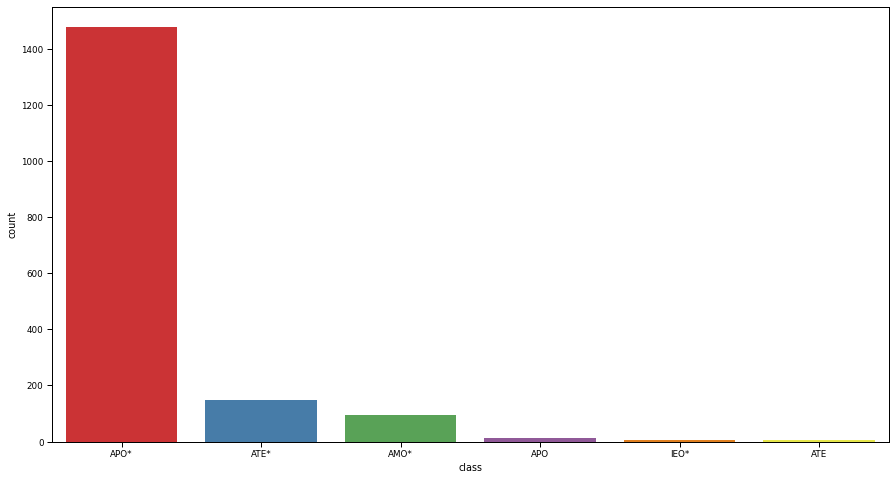

In [17]:
# make the visualitions for the better understanding of the classes

sns.countplot(x='class',data=df, palette='Set1')

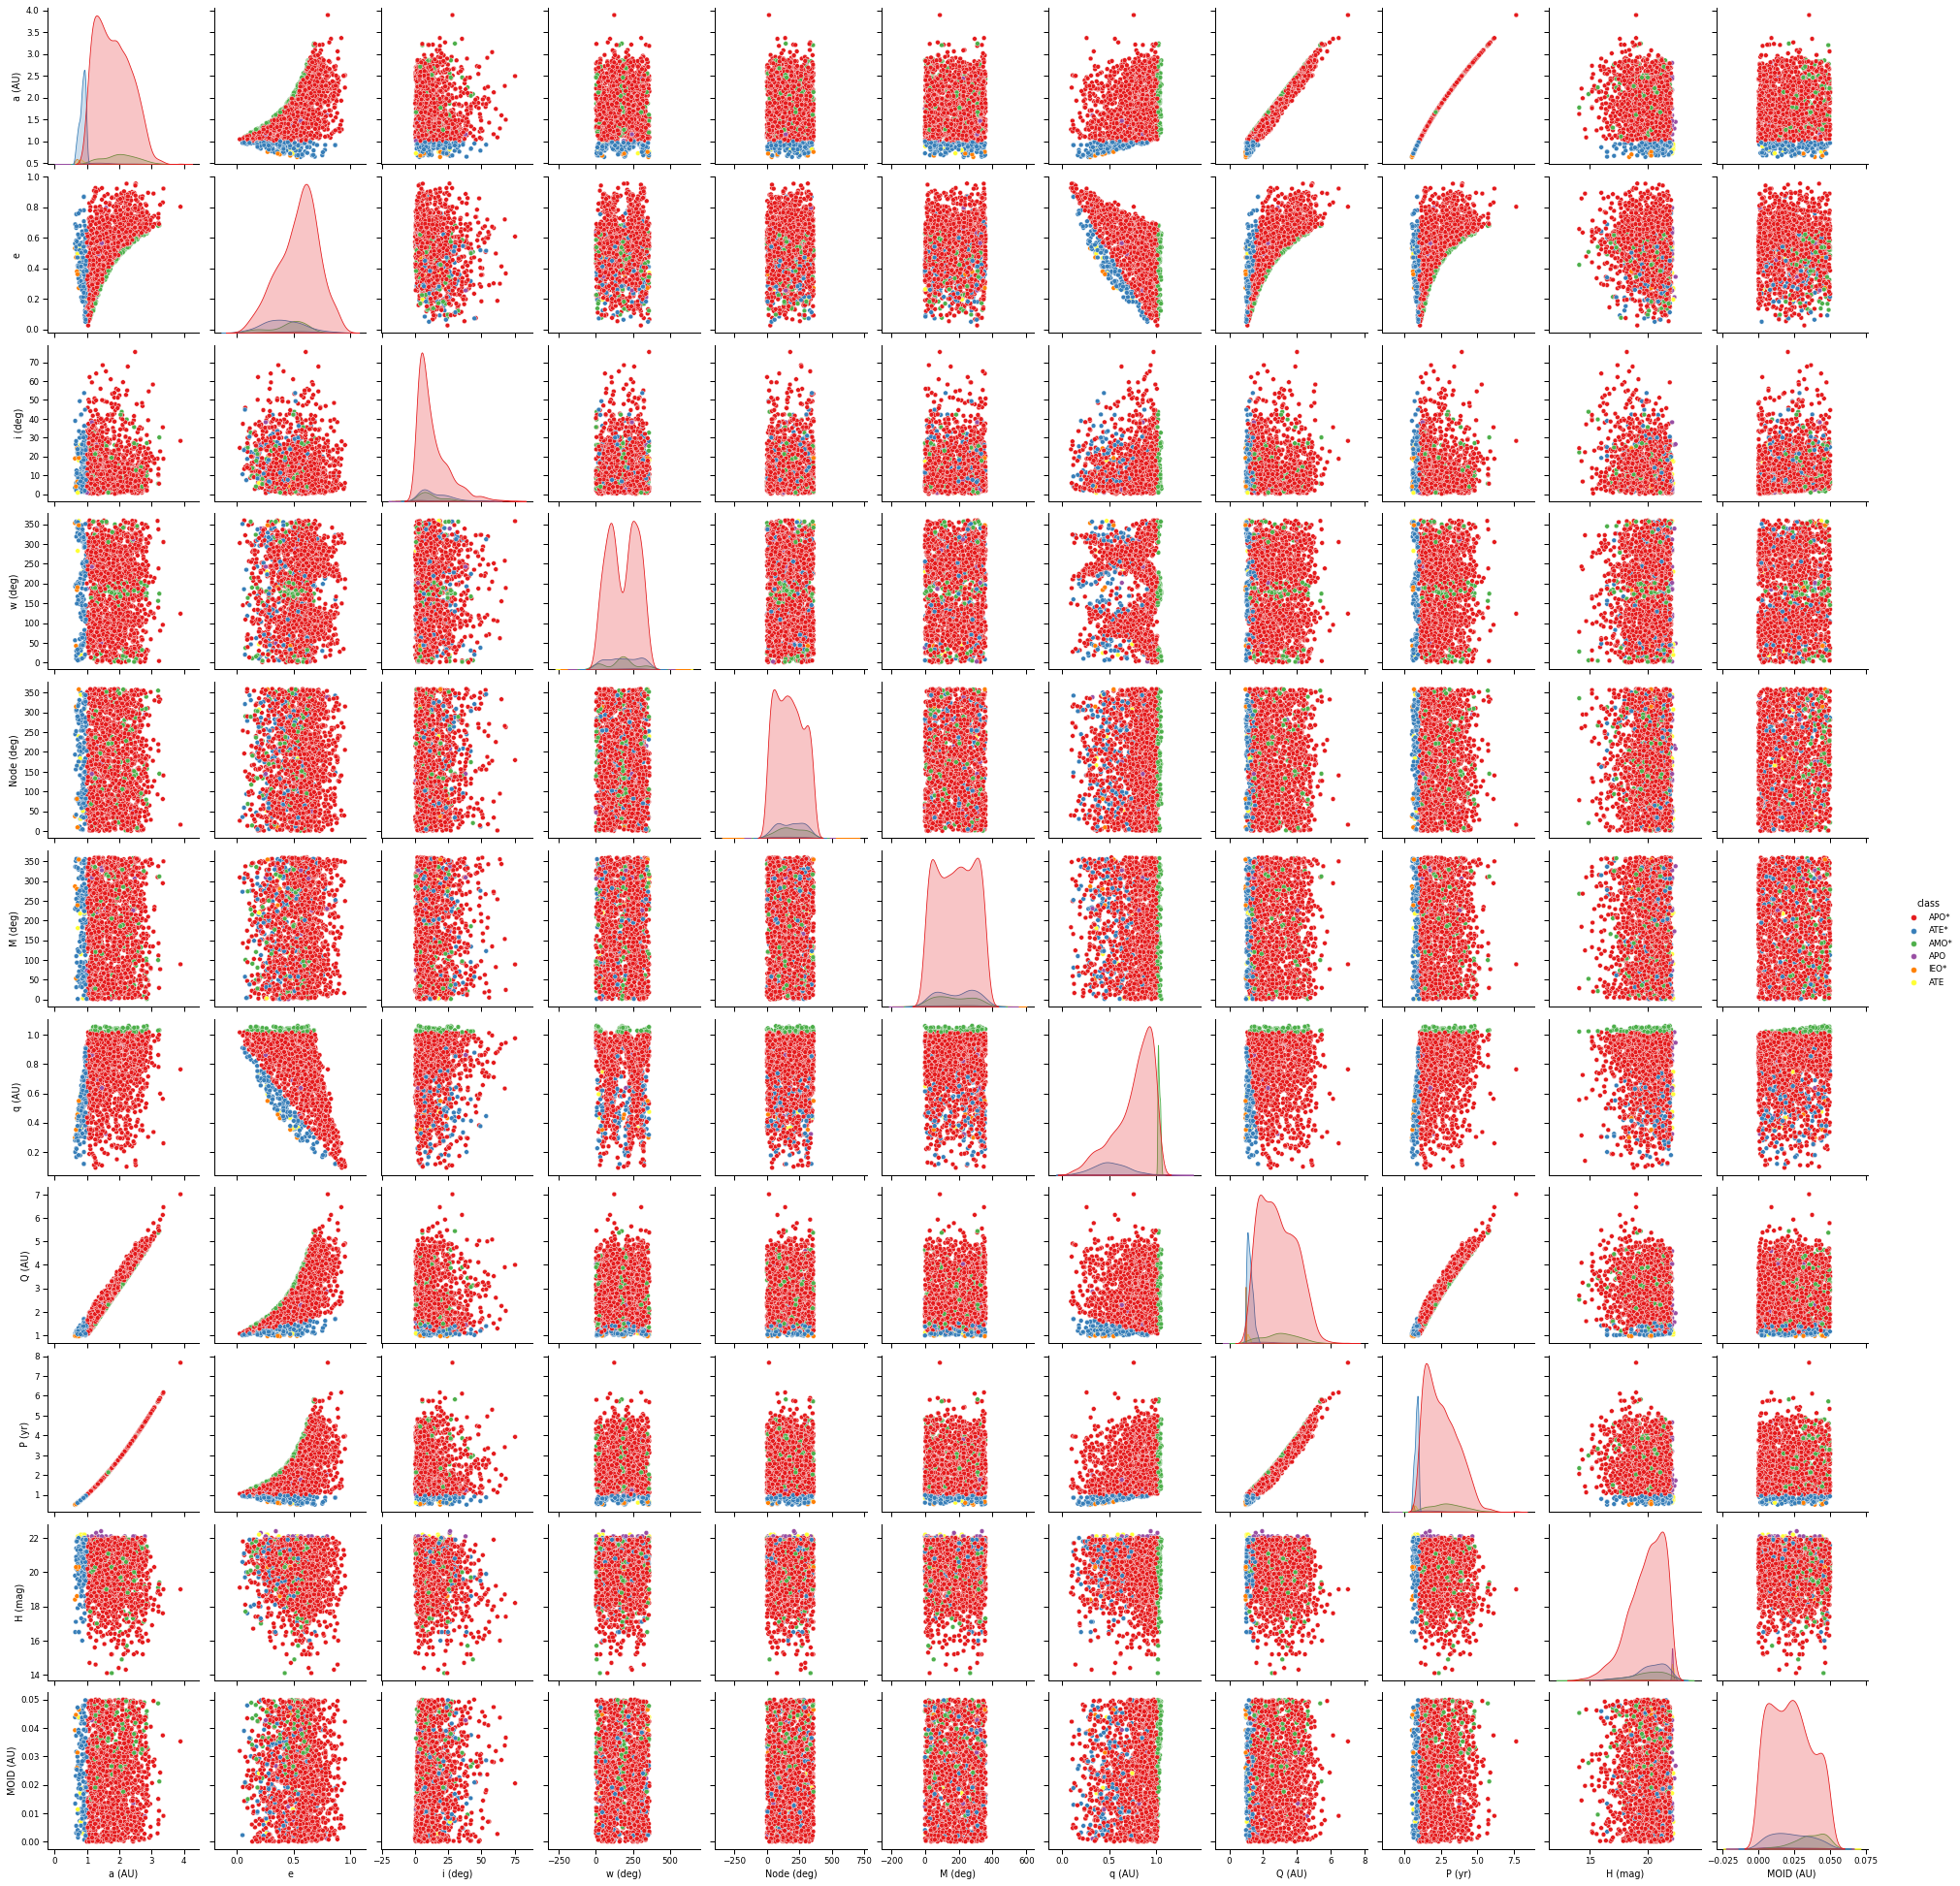

In [18]:
# now we analyse, wich factors makes the most and the less influence 
# for that we are using histograms colored with the class. 

sns.pairplot(data=df,hue='class', palette='Set1')

# this was used to plot with class itself but it did not show any direct influence.
#sns.pairplot(data=df, palette='Set1')

From this diagram we can see a linear dependencies between *a (AU)* and *Q (AU)*. 

Additionally we can see a quadratic dependecy between *a (AU)* and *P(yr)*.
 

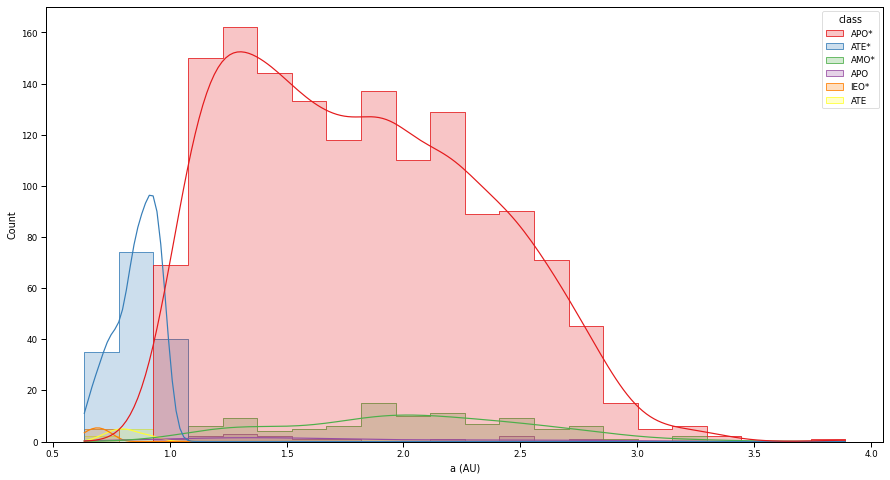

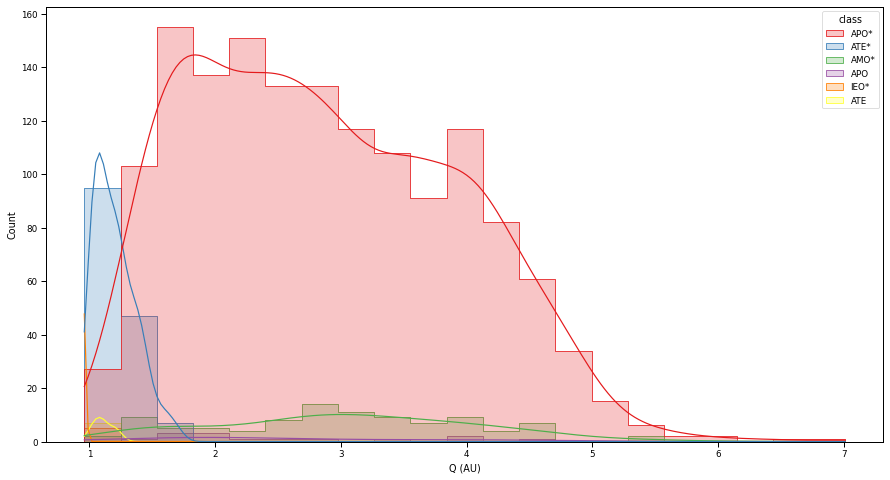

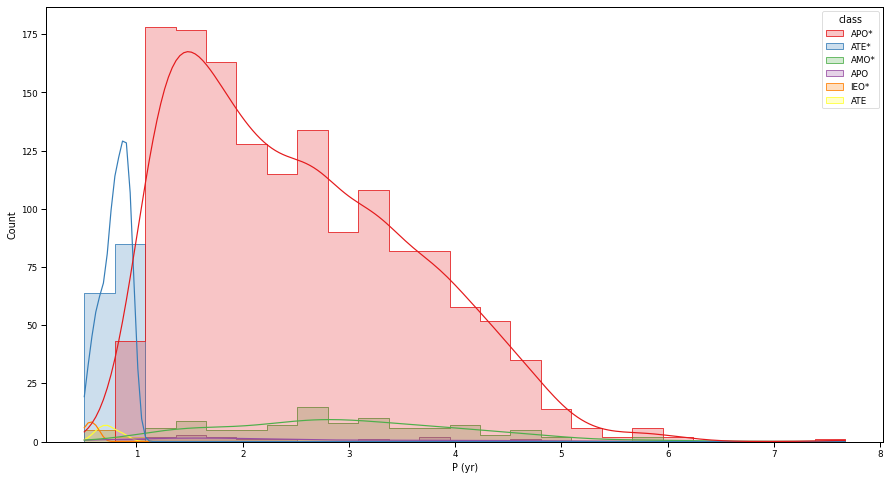

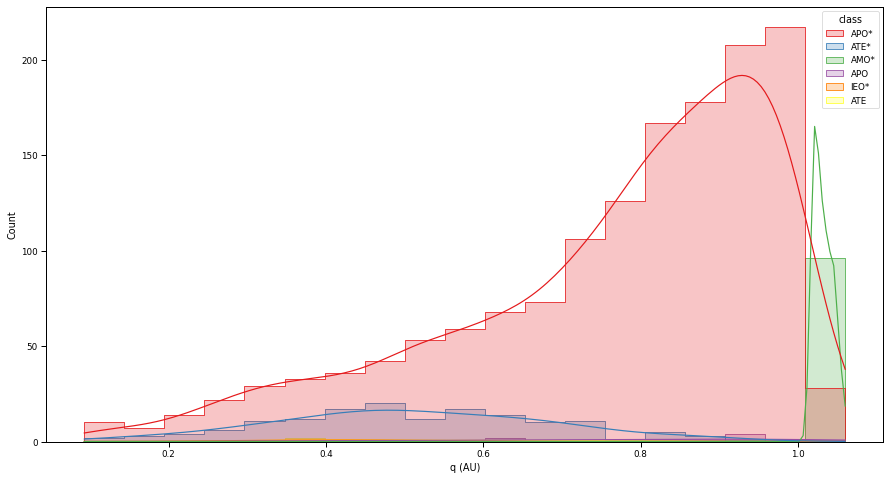

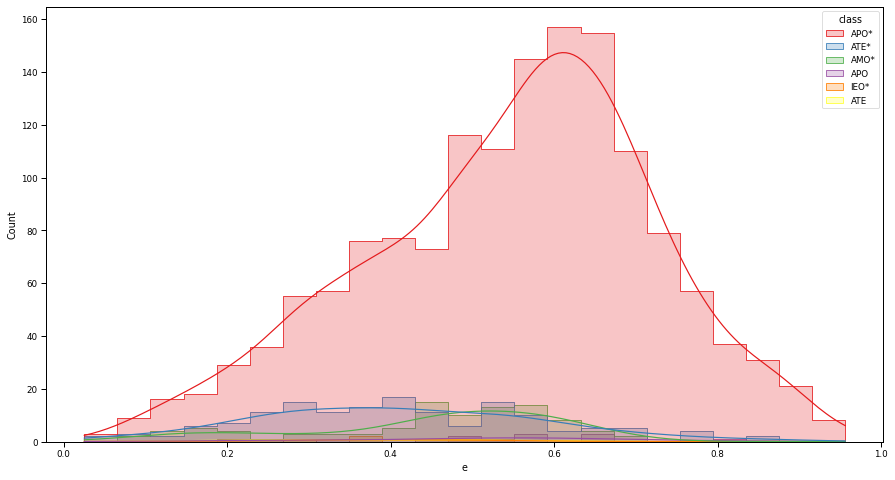

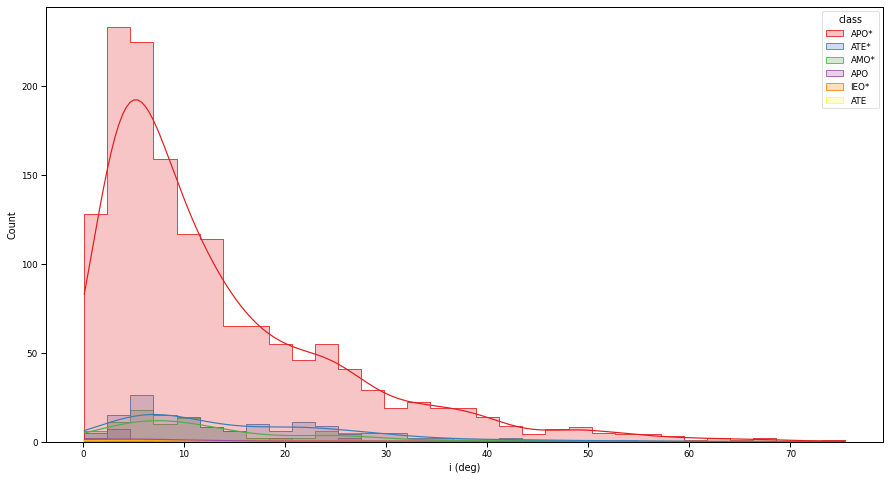

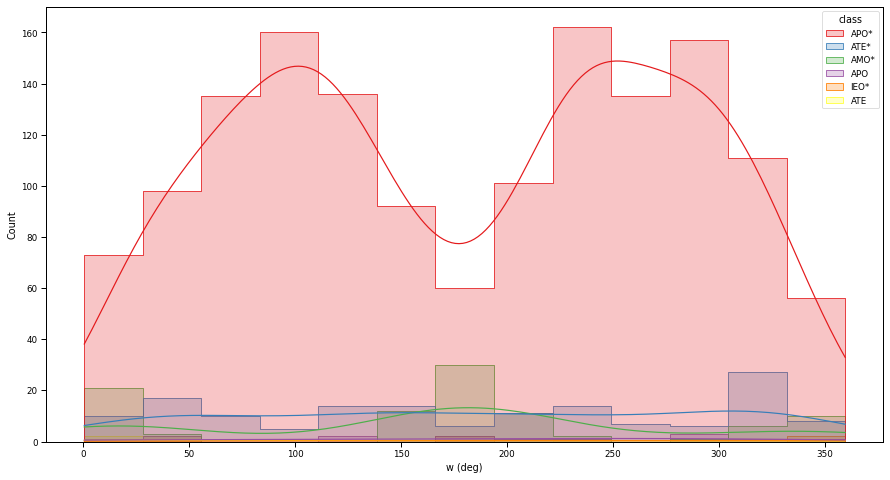

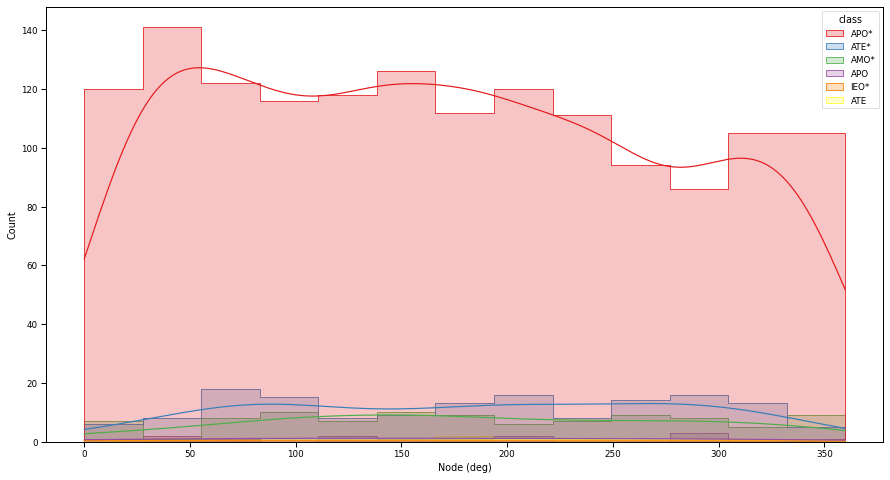

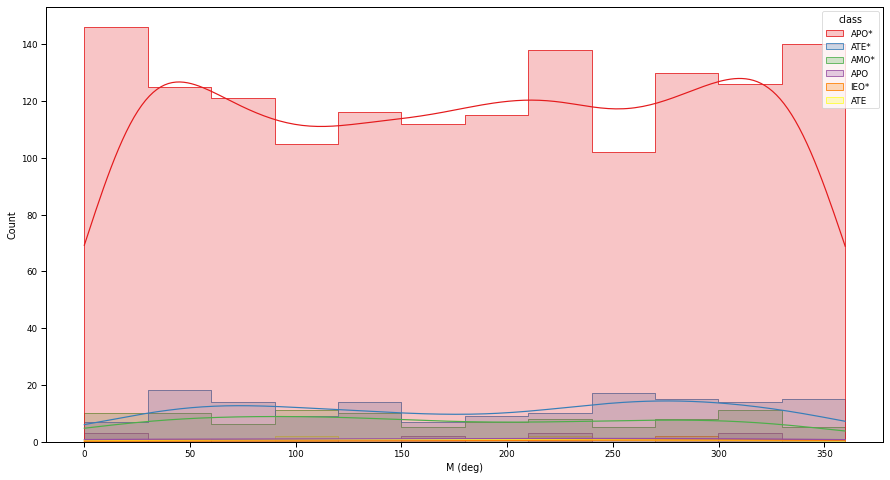

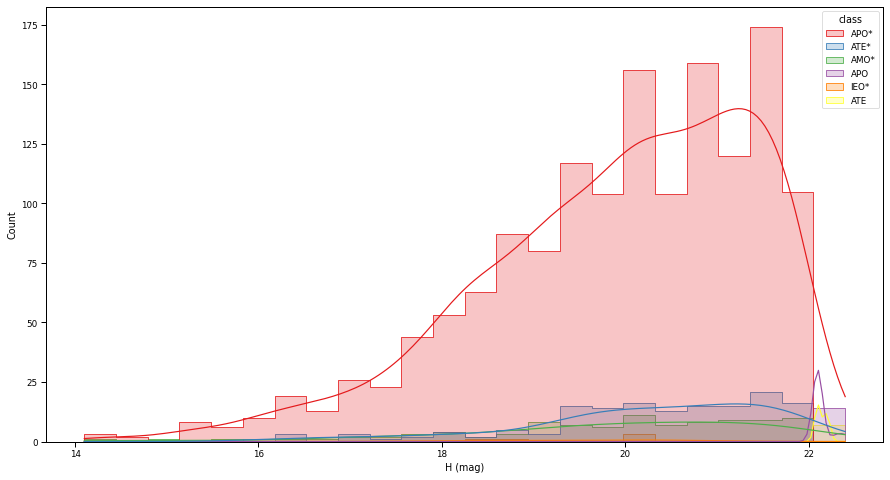

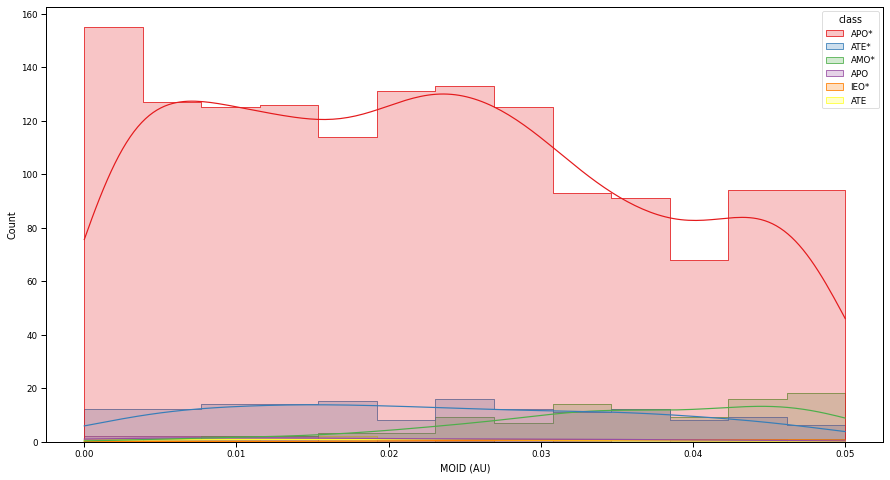

In [19]:
#for current_column in df.columns.drop('class') 
# plot similar features together
for current_column in ['a (AU)','Q (AU)', 'P (yr)', 'q (AU)', 'e', 'i (deg)', 'w (deg)', 'Node (deg)', 'M (deg)',
        'H (mag)', 'MOID (AU)']:
  sns.histplot(data=df,x=current_column, hue='class', kde=True, element='step', palette='Set1')
  plt.show()

# Building Machine Learning Model

Because we have an unbalanced dataset we are using for the biggest class approximate the size of the second biggest class. 

In [20]:
df_handbalanced=df.groupby(['class']).head(150)

In [21]:
df_handbalanced['class'] .value_counts()

APO*    150
ATE*    149
AMO*     96
APO      14
ATE       7
IEO*      5
Name: class, dtype: int64

Preparing our $X$ and $y$ for the machine learning model. We drop columns which has no influence after studying them with different models and through the data analysis.

In [22]:
from sklearn.model_selection import train_test_split
y = df_handbalanced['class']
drop_columns= ['class','MOID (AU)','Node (deg)','i (deg)','e', 'w (deg)', 'M (deg)', 'P (yr)']
#drop_columns= ['class']
X = df_handbalanced.drop(columns=drop_columns)

In [23]:
# We use the train_test_split function to split our data into four parts
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    test_size=0.33, 
                                                    shuffle=True,
                                                    random_state=123)

Here we tried out different methods to oversample or undersample to avoid an influence of the imbalanced data.

Even with all this attemps the accuracy was still very high >99%.


In [24]:
#import imblearn
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE
#from imblearn.over_sampling import ADASYN
#from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import RandomOverSampler

#from imblearn.under_sampling import RandomUnderSampler

#sm = SMOTE(random_state = 420, kind='regular', k_neighbors=2)
#sm = SMOTE(random_state = 42, sampling_strategy='minority', k_neighbors=2)
#sm = BorderlineSMOTE(random_state = 42, kind='borderline-2')#, k_neighbors=2)
#sm = ADASYN(random_state = 42, sampling_strategy='minority', n_neighbors=2)
#sm = SMOTEENN(random_state = 42)
#sm = RandomOverSampler(random_state=42)

#X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

#rus = RandomUnderSampler(random_state=42)
#X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)


Here we define new variables so that we can easy experiment with different sampling methods.

In [25]:
X_train_balanced = X_train
y_train_balanced = y_train

#X_train_balanced = X_train_oversampled
#y_train_balanced = y_train_oversampled


Look at the disstribution of the train dataset so that we can compare it later with the test dataset to see if there is the same distribution.

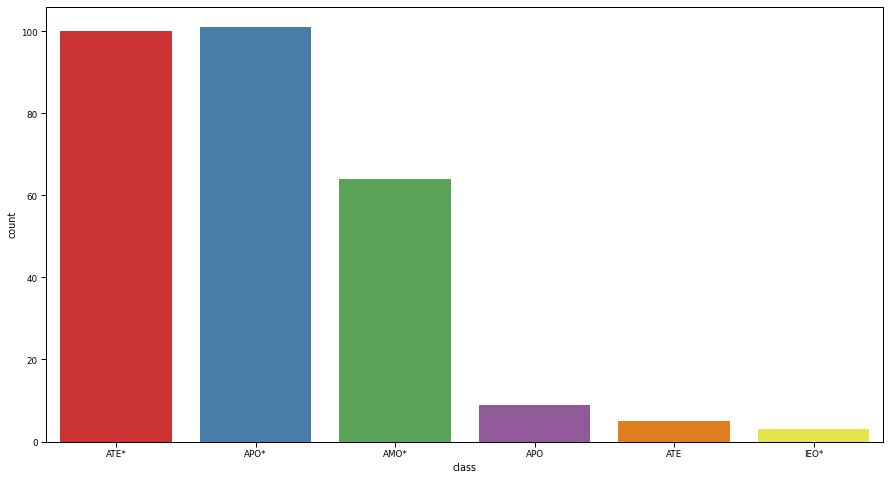

In [26]:
df_balanced = pd.DataFrame(data=X_train_balanced, columns=df.columns.drop(drop_columns))

df_balanced['class'] = y_train_balanced
sns.countplot(x='class', data=df_balanced, palette='Set1')

In [27]:
df_balanced['class'].value_counts()

APO*    101
ATE*    100
AMO*     64
APO       9
ATE       5
IEO*      3
Name: class, dtype: int64

Plot the distribution of the test dataset and has the same distribution.

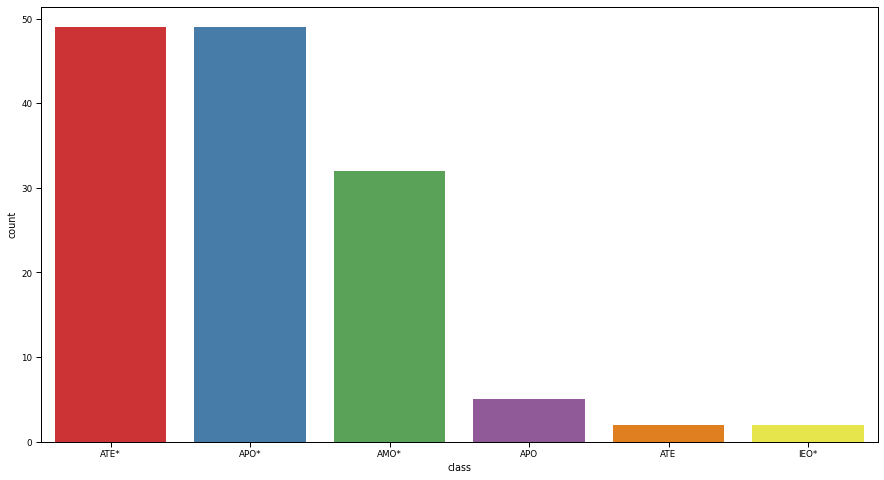

In [28]:
df_test = pd.DataFrame(data=X_test, columns=df.columns.drop('class'))

df_test['class'] = y_test
sns.countplot(x='class', data=df_test, palette='Set1')

In [29]:
df_test['class'].value_counts()

ATE*    49
APO*    49
AMO*    32
APO      5
IEO*     2
ATE      2
Name: class, dtype: int64

In [30]:
# Let's check the shape of our train dataset
df_balanced.shape

(282, 5)

In [31]:
# Quick sanity check 
len(df_handbalanced) * (1 - 0.33)

282.07

In [32]:
# Trying out which Classifier gives the best accuracy score

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


#classificator = GradientBoostingClassifier(n_estimators=100, random_state=123)
classificator = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
#classificator = RandomForestClassifier(n_estimators=100, random_state = 123)


In [33]:

# Train ("fit") the model on the training data
classificator.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [34]:
# Use the trained model to make predictions on the test data
y_pred = classificator.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

We tried everything but the accuracy is always very high.

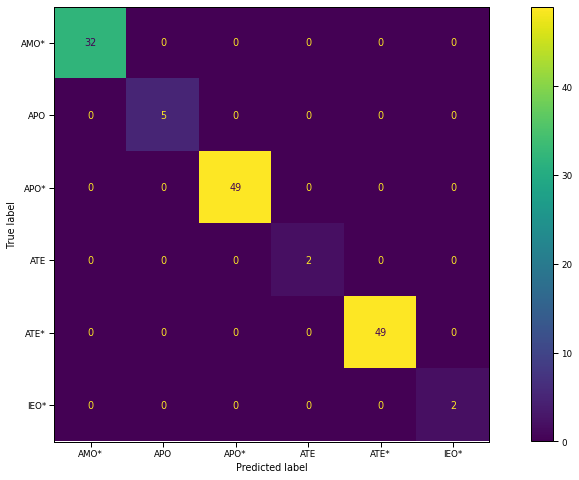

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificator, X_test, y_test, values_format = '')

In [37]:
from sklearn.metrics import classification_report
# Let's use the classification_report function to understand the results better
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        AMO*       1.00      1.00      1.00        32
         APO       1.00      1.00      1.00         5
        APO*       1.00      1.00      1.00        49
         ATE       1.00      1.00      1.00         2
        ATE*       1.00      1.00      1.00        49
        IEO*       1.00      1.00      1.00         2

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



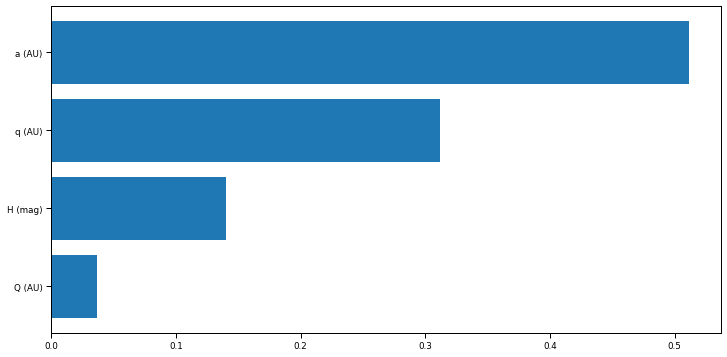

In [45]:
feature_importance = classificator.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns.drop(drop_columns))[sorted_idx])

plt.show()

We had a lot of features which were not important so we dropped them and leave only those four.

We repeat here the features:

* a (AU) -- Semi-major axis of the orbit in AU
* e -- Eccentricity of the orbit
* i (deg) -- Inclination of the orbit with respect to the ecliptic * * plane and the equinox of J2000 (J2000-Ecliptic) in degrees
* w (deg) -- Argument of perihelion (J2000-Ecliptic) in degrees
* Node (deg) -- Longitude of the ascending node (J2000-Ecliptic) in degrees
* M (deg) -- Mean anomoly at epoch in degrees
* q (AU) -- Perihelion distance of the orbit in AU
* Q (AU) -- Aphelion distance of the orbit in AU
* P (yr) -- Orbital period in Julian years
* H (mag) -- Absolute V-magnitude
* MOID (AU) -- Minimum orbit intersection distance (the minimum  distance between the osculating orbits of the NEO and the Earth class -- Object classification


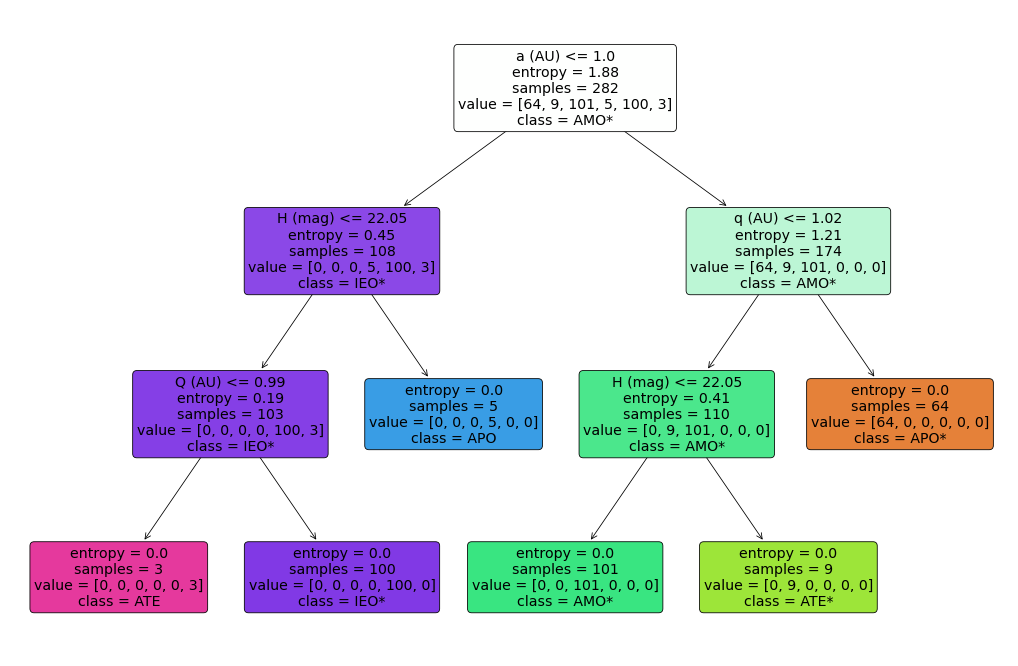

In [47]:
# for decicion tree classificator
from sklearn import tree
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(classificator, 
                   feature_names=df.columns.drop(drop_columns),  
                   class_names=df['class'].unique(),
                   rounded = True, proportion = False, 
                   precision = 2, filled = True)

##The decicion tree additionally shows that the four choosen features are enough to fully classify the asteroid.

In [40]:
#https://towardsdatascience.com/dealing-with-imbalanced-dataset-642a5f6ee297
#https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/